In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r"C:\Users\suhail\Desktop\Datasets\fake and real news\fake_or_real_news.csv")    #importing the Dataset from local Machine
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [16]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [17]:
df['title'].value_counts()

OnPolitics | 's politics blog                                                                            5
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence       3
Michael Moore Owes Me $4.99                                                                              3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                              3
Syrian War Report – November 2, 2016: ISIS and Al-Nusra Attempt to Cut Off Govt Supply Line to Aleppo    2
                                                                                                        ..
Carl G. Jung Attitude Types and the Sash of Solitude                                                     1
Old rivals Obama and McCain tussle over Iran                                                             1
Russia Calls Downing Of Its Plane A 'Planned Provocation'                                                1
Canada Just Threw A Grenade Into Eliz

In [18]:
df = df.drop(['Unnamed: 0'],axis=1)    #Dropping the feature which we don't need
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [19]:
import string as st 

In [20]:
def remove_punctuation(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [21]:
df['New_text']=df['text'].apply(lambda x: remove_punctuation(x))     
df.head(5)

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [22]:
import re
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]

In [23]:
df['New_text'] = df['New_text'].apply(lambda msg:tokenize(msg))
df.head()


,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, a, shillman, journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[us, secretary, of, state, john, f, kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, in, new, york, and, frontr..."


In [24]:

def rem_small_words(text):
    return [x for x in text if len(x)>2]

In [25]:
df['New_text'] = df['New_text'].apply(lambda x: rem_small_words(x))
df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, the..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, new, york, and, frontrunne..."


label
FAKE    3164
REAL    3171
Name: text, dtype: int64


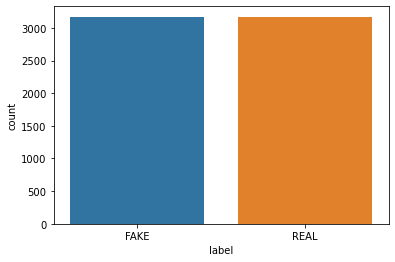

In [35]:
import seaborn as sns          
print(df.groupby(['label'])['text'].count())
sns.countplot(df['label'])

Text(0.5, 1.0, 'Fake news')

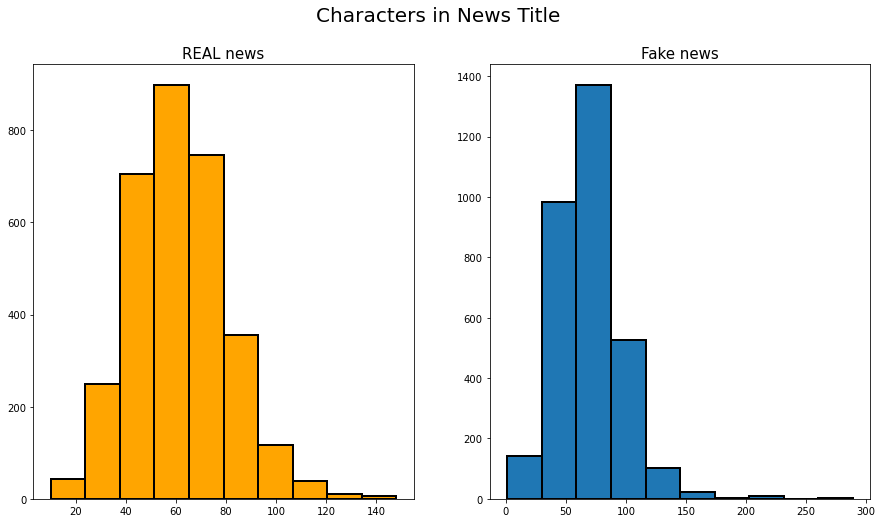

In [36]:

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=df[df['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=df[df['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

In [37]:
import nltk
import seaborn as sns
fake_text_vis =' '.join([str(x) for x in df[df['label']=='FAKE']['New_text']])
a = nltk.FreqDist(fake_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
8934,"'lafrance',",1
57755,"'\x93politics',",1
49164,"'polycyclic',",2
31332,"'aba',",4
30108,"'campsites',",1
55222,"'‘including',",1
69158,"'astute',",2
37718,"'soberly',",4
62286,"'narratives”',",2
68746,"'prosecutionsettlement',",1


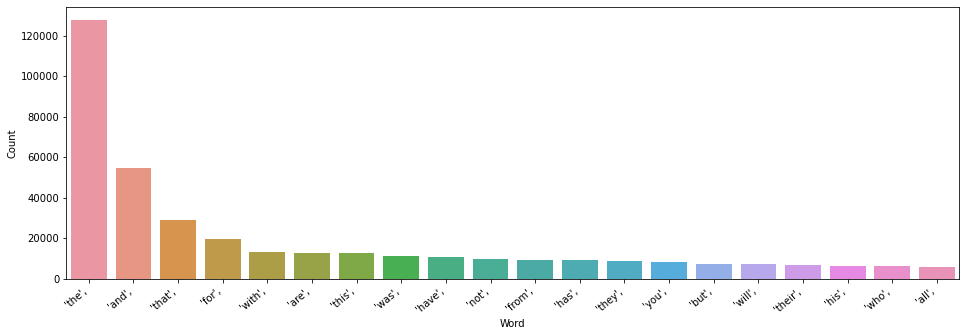

In [38]:
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [40]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for RandomForestClassifier")
print("Accuracy score : {}".format(accuracy1))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

ModuleNotFoundError: No module named 'mlxtend'